# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from envs.maze import *

# Create environment

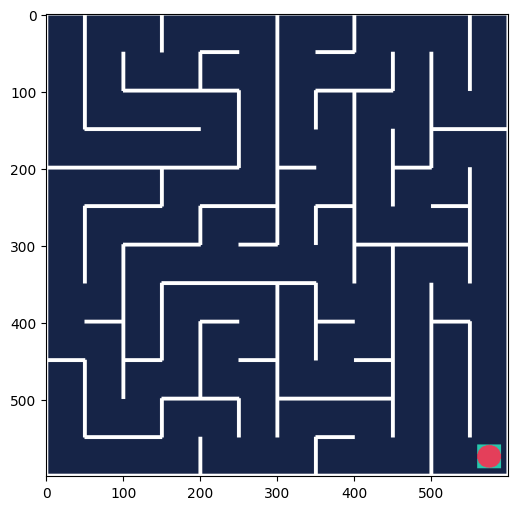

Observation space shape: [12 12]
Number of actions: 4


In [2]:
maze_size = 12
env = Maze(size=maze_size, wall_density=0.0001, branch_density=0.9999)
display_frame_onscreen(env)
print(f"Observation space shape: {env.observation_space.nvec}")
print(f"Number of actions: {env.action_space.n}")

In [3]:
state_len = maze_size # Square of this size per side
action_len = 4 # 4 actions. action_meanings = {0: 'U', 1: 'R', 2: 'D', 3: 'L'}

# Policy

In [4]:
gamma = 0.99 # discount factor
tolerance = 1e-6

action_list = env.action_space.action_meanings.keys()
state_values = np.zeros(shape=(state_len, state_len))

def policy(state) -> int:
    max_state_value = float('-inf')
    best_action = 0
    for action in action_list:
        next_state, _, _, _, _ = env.simulate_step(state, action)
        next_state_value = state_values[next_state]
        if (next_state_value > max_state_value):
            max_state_value = next_state_value
            best_action = action
    return best_action

# Train: value iteration

Value iteration iteratively computes optimal state values by finding the maximum value among all possible actions from each state. The algorithm converges when the maximum change in state values is below a tolerance threshold. This is a value-based, model-based, offline reinforcement learning method that uses dynamic programming to find the optimal policy.

In [5]:
def value_iteration(state_values, tolerance=1e-6, gamma=0.99):
    delta = float('inf')
    transition_prob = 1 # deterministic behavior: the same action applied at the same state always leads to the same next_state

    while (delta > tolerance):
        delta = 0
        for row in range(state_len):
            for col in range(state_len):
                max_state_value = float('-inf')
                state = (row, col)
                state_value = state_values[state]
                for action in action_list:
                    next_state, reward, terminated, truncated, info = env.simulate_step(state, action)
                    next_state_value = transition_prob * (reward + gamma * state_values[next_state])
                    if (next_state_value > max_state_value):
                        max_state_value = next_state_value
                state_values[state] = max_state_value
                
                state_value_abs_diff = abs(state_value - state_values[state])
                delta = max(delta, state_value_abs_diff)

value_iteration(state_values, tolerance=tolerance, gamma=gamma)

# Results

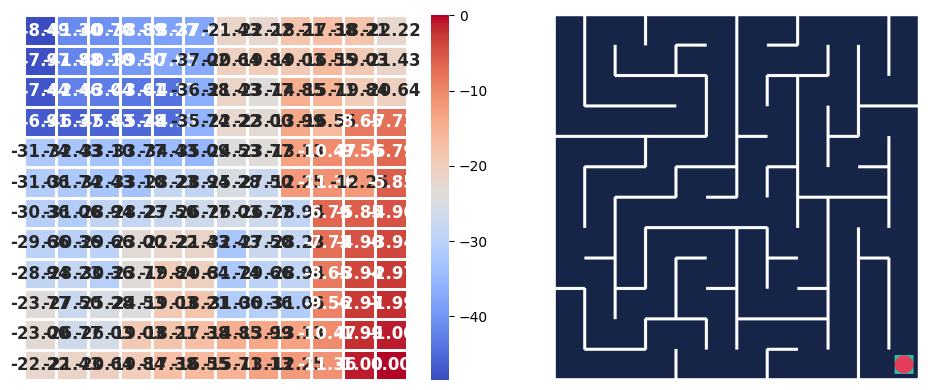

In [6]:
plot_values(state_values, env)

In [7]:
test_agent(env, policy, episodes=1, show_html=True)